In [2]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests
import plotly.graph_objects as go

# Question 5 - Tesla Stock and Revenue Dashboard

C:\Users\HP\AppData\Local\Temp\ipykernel_13652\992707412.py:11: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



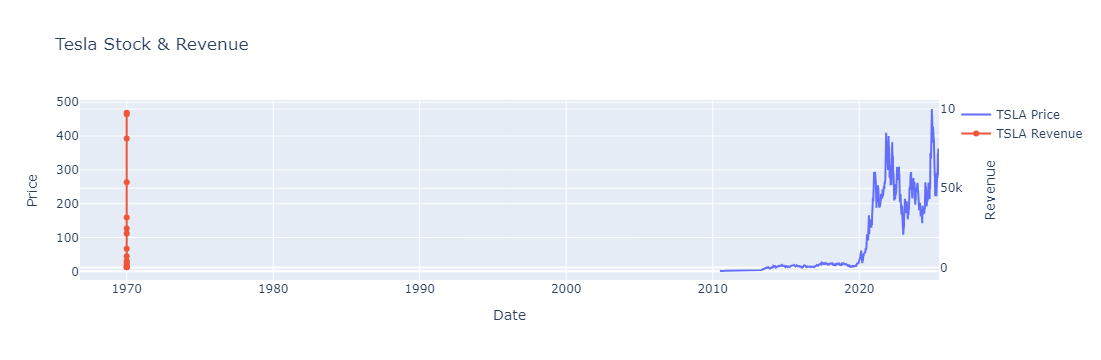

In [12]:

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

def get_tsla_revenue():
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
    res = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
    res.raise_for_status()
    soup = BeautifulSoup(res.text, "html.parser")
    for table in soup.find_all('table'):
        df = pd.read_html(str(table))[0]
        if df.shape[1] >= 2 and 'Revenue' in df.columns[1]:
            df.columns = ["Date", "Revenue"] + list(df.columns[2:])
            df = df[df["Revenue"].astype(str).str.strip() != ""]
            df['Revenue'] = (
                df['Revenue']
                .astype(str)
                .str.replace(r"[\$,]", "", regex=True)
                .astype(float)
            )
            df['Date'] = pd.to_datetime(df['Date'])
            return df.reset_index(drop=True)
    raise ValueError("Tesla revenue table not found")

tsla_revenue = get_tsla_revenue()


def plot_tsla(price, revenue):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=price.Date, y=price.Close, name="TSLA Price"))
    fig.add_trace(go.Scatter(x=revenue.Date, y=revenue.Revenue, name="TSLA Revenue", yaxis="y2"))
    fig.update_layout(
        title="Tesla Stock & Revenue", xaxis_title="Date",
        yaxis=dict(title="Price"),
        yaxis2=dict(overlaying="y", side="right", title="Revenue")
    )
    return fig

fig = plot_tsla(tesla_data, tsla_revenue)
fig.show()
